# Illinois Excel Data Analysis with Pandas

This notebook demonstrates the analysis of the `Illinois.xlsx` file from the export folder using pandas. Moreover, it considers main types of data that we can infer and investigate from this project. 

## 1. Import Required Libraries
Import pandas and any other necessary libraries for data analysis.

In [1]:
!cd export
!pip install pandas

In [2]:
import pandas as pd


## 2. Load the Excel File
Use pandas' `read_excel` function to load the 'Illinois.xlsx' file into a DataFrame.

In [3]:
# Load the CSV file
file_path = 'c:/Users/osmon/Desktop/custom_data/export/Illinois.csv'

# Skip the first two rows and use the third row as the header
df = pd.read_csv(file_path, header=2)

# Clean up column names by stripping any extra whitespace
df.columns = df.columns.str.strip()

# Remove the last row if it's problematic (as seen in the file summary)
if df.iloc[-1]['State'] == '98 Special Classification Provisions, Nesoi':
    df = df.iloc[:-1]


df.head()

,State,Commodity,Country,Time,Vessel Value ($US),Containerized Vessel Total Exports Value ($US),Vessel SWT (kg),Containerized Vessel Total Exports SWT (kg)
0,Illinois,01 Live Animals,Africa,Jul-16,"7,185","7,185",6,6
1,Illinois,01 Live Animals,Africa,Feb-20,"13,792",NaN,494,NaN
2,Illinois,01 Live Animals,Asia - South,Jun-18,"15,087","15,087","1,422","1,422"
3,Illinois,01 Live Animals,Asia - Other,Mar-08,"12,515",NaN,"19,958",NaN
4,Illinois,01 Live Animals,Asia - Other,Jul-08,"12,135",NaN,"20,284",NaN


In [4]:
# Debug: Check file existence and list directory contents
import os

# Print current working directory
print("Current working directory:", os.getcwd())

# Check if file exists
print("File exists:", os.path.exists(file_path))

# List contents of the export directory
export_dir = 'c:/Users/osmon/Desktop/custom_data/export'
print("\nContents of export directory:")
if os.path.exists(export_dir):
    print(os.listdir(export_dir))
else:
    print("Export directory not found")

Current working directory: C:\Users\osmon\Desktop\custom_data
File exists: True

Contents of export directory:
['.DS_Store', 'Arkansas.csv', 'Illinois.csv', 'Iowa.csv', 'Louisiana.csv', 'Minnesota.csv', 'Mississippi.csv', 'Missouri.csv', 'Wisconsin.csv']


In [5]:
import os
print("File exists:", os.path.exists(file_path))

File exists: True


## 3. Explore the DataFrame
Display the first few rows, check the shape, and inspect column names and data types.

In [6]:
# Display the first 5 rows
print('First 5 rows:')
display(df.head())

# Shape of the DataFrame
print('Shape:', df.shape)

# Column names
print('Columns:', df.columns.tolist())

# Data types
print('Data types:')
print(df.dtypes)

First 5 rows:


,State,Commodity,Country,Time,Vessel Value ($US),Containerized Vessel Total Exports Value ($US),Vessel SWT (kg),Containerized Vessel Total Exports SWT (kg)
0,Illinois,01 Live Animals,Africa,Jul-16,"7,185","7,185",6,6
1,Illinois,01 Live Animals,Africa,Feb-20,"13,792",NaN,494,NaN
2,Illinois,01 Live Animals,Asia - South,Jun-18,"15,087","15,087","1,422","1,422"
3,Illinois,01 Live Animals,Asia - Other,Mar-08,"12,515",NaN,"19,958",NaN
4,Illinois,01 Live Animals,Asia - Other,Jul-08,"12,135",NaN,"20,284",NaN


Shape: (110711, 8)
Columns: ['State', 'Commodity', 'Country', 'Time', 'Vessel Value ($US)', 'Containerized Vessel Total Exports Value ($US)', 'Vessel SWT (kg)', 'Containerized Vessel Total Exports SWT (kg)']
Data types:
State                                             object
Commodity                                         object
Country                                           object
Time                                              object
Vessel Value ($US)                                object
Containerized Vessel Total Exports Value ($US)    object
Vessel SWT (kg)                                   object
Containerized Vessel Total Exports SWT (kg)       object
dtype: object


## 4. Basic Data Analysis with Pandas
Perform basic analysis such as summary statistics, value counts, and filtering rows.

In [7]:
# Summary statistics for numeric columns
print('Summary statistics:')
display(df.describe())

# Value counts for the first column (if categorical)
first_col = df.columns[0]
print(f'Value counts for {first_col}:')
display(df[first_col].value_counts())

# Example: Filter rows where the first column equals its first value
first_value = df[first_col].iloc[0]
filtered_df = df[df[first_col] == first_value]
print(f'Rows where {first_col} == {first_value}:')
display(filtered_df.head())

Summary statistics:


,State,Commodity,Country,Time,Vessel Value ($US),Containerized Vessel Total Exports Value ($US),Vessel SWT (kg),Containerized Vessel Total Exports SWT (kg)
count,110711,110711,110711,110711,110711,104171,110709,104170
unique,1,97,10,209,100259,93598,81052,75321
top,Illinois,"84 Nuclear Reactors, Boilers, Machinery Etc.; ...",Asia - Other,May-14,"10,000","10,000",1,"1,000"
freq,110711,1878,16835,563,87,67,71,71


Value counts for State:


State
Illinois    110711
Name: count, dtype: int64

Rows where State == Illinois:


,State,Commodity,Country,Time,Vessel Value ($US),Containerized Vessel Total Exports Value ($US),Vessel SWT (kg),Containerized Vessel Total Exports SWT (kg)
0,Illinois,01 Live Animals,Africa,Jul-16,"7,185","7,185",6,6
1,Illinois,01 Live Animals,Africa,Feb-20,"13,792",NaN,494,NaN
2,Illinois,01 Live Animals,Asia - South,Jun-18,"15,087","15,087","1,422","1,422"
3,Illinois,01 Live Animals,Asia - Other,Mar-08,"12,515",NaN,"19,958",NaN
4,Illinois,01 Live Animals,Asia - Other,Jul-08,"12,135",NaN,"20,284",NaN


## 5. Analyze Commodities and Export Amounts
Summarize the unique commodities and their total export amounts. Visualize the top commodities.

## 6. Modeling Ideas
Discuss possible predictive models and next steps for export data analysis.

Unique commodities:
['01 Live Animals' '02 Meat And Edible Meat Offal'
 '03 Fish, Crustaceans & Aquatic Invertebrates'
 '04 Dairy Prods; Birds Eggs; Honey; Ed Animal Pr Nesoi'
 '05 Products Of Animal Origin, Nesoi'
 '06 Live Trees, Plants, Bulbs Etc.; Cut Flowers Etc.'
 '07 Edible Vegetables & Certain Roots & Tubers'
 '08 Edible Fruit & Nuts; Citrus Fruit Or Melon Peel'
 '09 Coffee, Tea, Mate & Spices' '10 Cereals'
 '11 Milling Products; Malt; Starch; Inulin; Wht Gluten'
 '12 Oil Seeds Etc.; Misc Grain, Seed, Fruit, Plant Etc'
 '13 Lac; Gums, Resins & Other Vegetable Sap & Extract'
 '14 Vegetable Plaiting Materials & Products Nesoi'
 '15 Animal, Vegetable Or Microbial Fats And Oils Etc'
 '16 Prep Of Meat,of Fish,of Crustaceans Etc,of Insects'
 '17 Sugars And Sugar Confectionary' '18 Cocoa And Cocoa Preparations'
 '19 Prep Cereal, Flour, Starch Or Milk; Bakers Wares'
 '20 Prep Vegetables, Fruit, Nuts Or Other Plant Parts'
 '21 Miscellaneous Edible Preparations'
 '22 Beverages, Spirits A

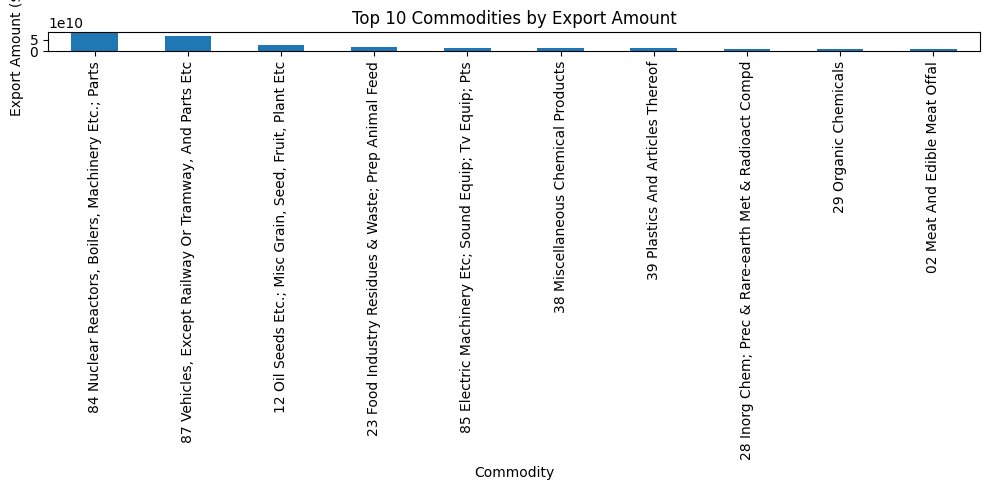

In [8]:
# Replace 'Commodity' and 'ExportAmount' with actual column names if different
commodity_col = 'Commodity'  # This is correct
amount_col = 'Vessel Value ($US)'  # Changed to the actual column name

# Convert the amount column to a numeric type, removing commas
df[amount_col] = pd.to_numeric(df[amount_col].str.replace(',', '', regex=False), errors='coerce')


# List unique commodities
print('Unique commodities:')
print(df[commodity_col].unique())

# Total export amount by commodity
top_commodities = df.groupby(commodity_col)[amount_col].sum().sort_values(ascending=False)
print('Top commodities by total export amount:')
print(top_commodities.head(10))

# Plot top 10 commodities
import matplotlib.pyplot as plt
top_commodities.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Commodities by Export Amount')
plt.ylabel('Export Amount ($US)')
plt.xlabel('Commodity')
plt.tight_layout()
plt.show()

## 7. Analyze Commodity Quantities and Rankings

In this section, we will calculate the total quantity of each commodity and rank them based on their quantities.

Top commodities by total quantity (weight in kg):
Commodity
12 Oil Seeds Etc.; Misc Grain, Seed, Fruit, Plant Etc    5.818376e+10
23 Food Industry Residues & Waste; Prep Animal Feed      5.705448e+10
27 Mineral Fuel, Oil Etc.; Bitumin Subst; Mineral Wax    5.208898e+10
10 Cereals                                               3.525344e+10
47 Wood Pulp Etc; Recovd (waste & Scrap) ppr & pprbd     1.421505e+10
87 Vehicles, Except Railway Or Tramway, And Parts Etc    5.383505e+09
84 Nuclear Reactors, Boilers, Machinery Etc.; Parts      5.181109e+09
39 Plastics And Articles Thereof                         4.853657e+09
72 Iron And Steel                                        4.291991e+09
28 Inorg Chem; Prec & Rare-earth Met & Radioact Compd    4.170289e+09
Name: Vessel SWT (kg), dtype: float64


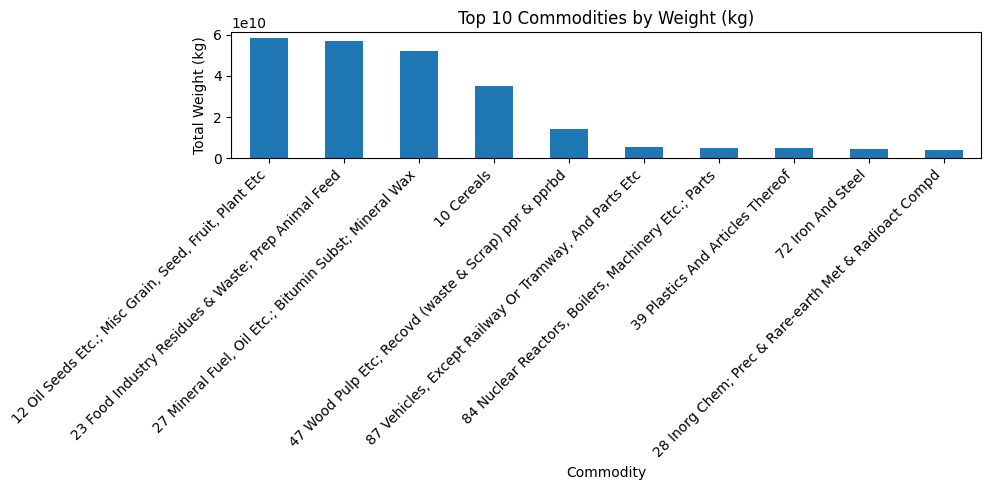

In [9]:
# Replace 'Commodity' and 'Quantity' with actual column names if different
quantity_col = 'Vessel SWT (kg)'  # Changed to the actual column name for weight/quantity

# Convert the quantity column to numeric, removing commas if any
df[quantity_col] = pd.to_numeric(df[quantity_col].str.replace(',', '', regex=False), errors='coerce')

# Total quantity by commodity
total_quantities = df.groupby(commodity_col)[quantity_col].sum().sort_values(ascending=False)
print('Top commodities by total quantity (weight in kg):')
print(total_quantities.head(10))

# Plot top 10 commodities by quantity
total_quantities.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Commodities by Weight (kg)')
plt.ylabel('Total Weight (kg)')
plt.xlabel('Commodity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 8. Analyze Export Destinations (Countries/Regions)

In this section, we will analyze the countries and regions that Illinois exports goods to, including total export values and quantities by destination.

Top export destinations by total value ($US):
Country
Asia - Other                     125247626417
Europe                            78444495142
South America                     55822129515
Australia and Oceania             44054058030
Africa                            18647095212
Asia Near East                    16618838030
Central America and Caribbean     12997599216
Asia - South                      12576757498
North America                      5344753408
Unidentified Countries                2070007
Name: Vessel Value ($US), dtype: int64

Top export destinations by total weight (kg):
Country
Asia - Other                     1.546188e+11
Europe                           5.193529e+10
South America                    1.507994e+10
North America                    1.500410e+10
Asia - South                     1.477684e+10
Africa                           1.033688e+10
Central America and Caribbean    8.595107e+09
Asia Near East                   4.853625e+09
Australia and Oceania   

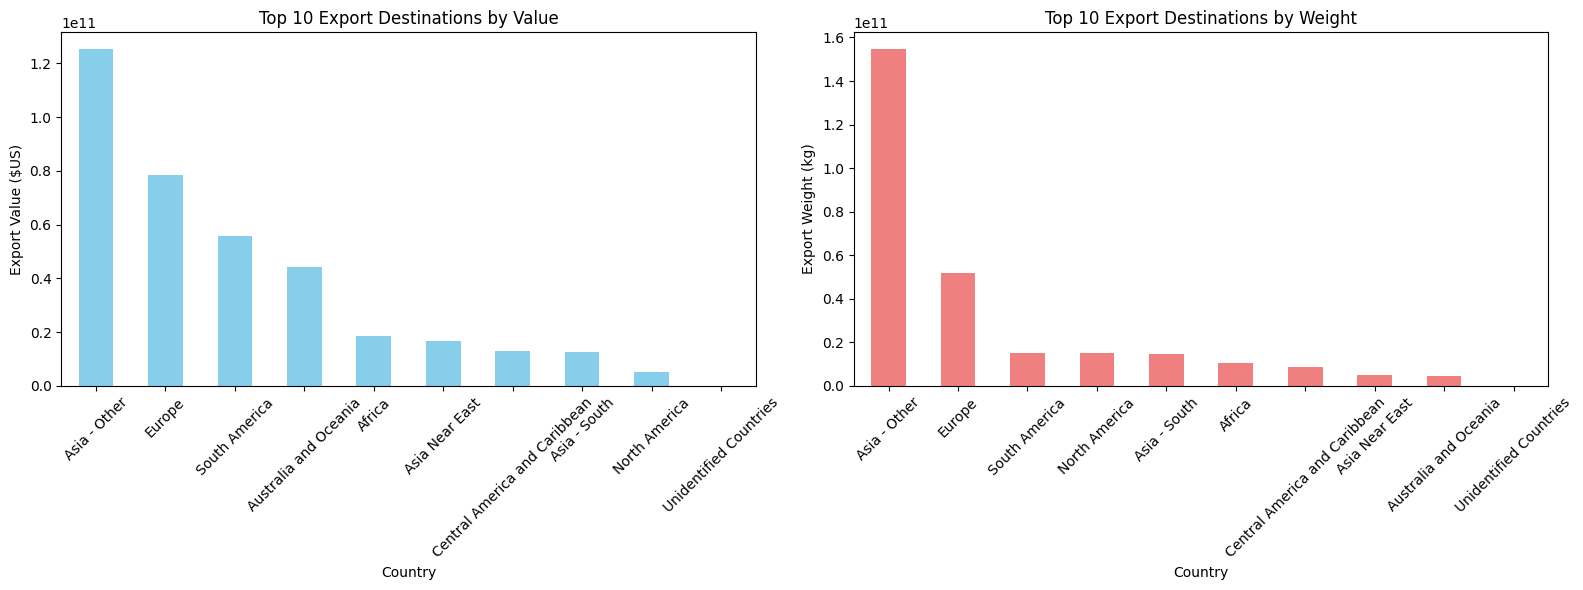

In [10]:
# Analyze export destinations by country
country_col = 'Country'

# Total export value by country
export_value_by_country = df.groupby(country_col)[amount_col].sum().sort_values(ascending=False)
print('Top export destinations by total value ($US):')
print(export_value_by_country.head(15))

# Total export weight by country
export_weight_by_country = df.groupby(country_col)[quantity_col].sum().sort_values(ascending=False)
print('\nTop export destinations by total weight (kg):')
print(export_weight_by_country.head(15))

# Create visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot top 10 countries by export value
export_value_by_country.head(10).plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Top 10 Export Destinations by Value')
ax1.set_ylabel('Export Value ($US)')
ax1.set_xlabel('Country')
ax1.tick_params(axis='x', rotation=45)

# Plot top 10 countries by export weight
export_weight_by_country.head(10).plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Top 10 Export Destinations by Weight')
ax2.set_ylabel('Export Weight (kg)')
ax2.set_xlabel('Country')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [11]:
# Detailed country analysis
print('=== EXPORT DESTINATION ANALYSIS ===\n')

# Number of unique countries
unique_countries = df[country_col].nunique()
print(f'Illinois exports to {unique_countries} different countries/regions')

# Top 5 countries with detailed breakdown
print('\n--- TOP 5 EXPORT DESTINATIONS (Detailed) ---')
top_5_countries = export_value_by_country.head(5).index

for country in top_5_countries:
    country_data = df[df[country_col] == country]
    total_value = export_value_by_country[country]
    total_weight = export_weight_by_country[country]
    avg_value_per_kg = total_value / total_weight if total_weight > 0 else 0
    num_commodities = country_data[commodity_col].nunique()
    
    print(f'\n{country}:')
    print(f'  • Total Export Value: ${total_value:,.0f}')
    print(f'  • Total Export Weight: {total_weight:,.0f} kg')
    print(f'  • Average Value per kg: ${avg_value_per_kg:.2f}')
    print(f'  • Number of Different Commodities: {num_commodities}')
    
    # Top 3 commodities for this country
    top_commodities_country = country_data.groupby(commodity_col)[amount_col].sum().sort_values(ascending=False).head(3)
    print(f'  • Top 3 Commodities:')
    for i, (commodity, value) in enumerate(top_commodities_country.items(), 1):
        print(f'    {i}. {commodity}: ${value:,.0f}')

# Regional analysis (basic grouping)
print('\n--- REGIONAL ANALYSIS ---')

# Create a simple regional mapping (you can expand this)
regional_mapping = {
    'Canada': 'North America',
    'Mexico': 'North America',
    'China': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'Germany': 'Europe',
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Netherlands': 'Europe',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Australia': 'Oceania'
}

# Add region column
df['Region'] = df[country_col].map(regional_mapping).fillna('Other/Unclassified')

# Regional export analysis
regional_exports = df.groupby('Region')[amount_col].sum().sort_values(ascending=False)
print('Export Value by Region:')
for region, value in regional_exports.items():
    percentage = (value / df[amount_col].sum()) * 100
    print(f'  {region}: ${value:,.0f} ({percentage:.1f}% of total)')



=== EXPORT DESTINATION ANALYSIS ===

Illinois exports to 10 different countries/regions

--- TOP 5 EXPORT DESTINATIONS (Detailed) ---

Asia - Other:
  • Total Export Value: $125,247,626,417
  • Total Export Weight: 154,618,814,315 kg
  • Average Value per kg: $0.81
  • Number of Different Commodities: 97
  • Top 3 Commodities:
    1. 12 Oil Seeds Etc.; Misc Grain, Seed, Fruit, Plant Etc: $23,700,965,695
    2. 84 Nuclear Reactors, Boilers, Machinery Etc.; Parts: $16,985,522,352
    3. 23 Food Industry Residues & Waste; Prep Animal Feed: $12,332,218,480

Europe:
  • Total Export Value: $78,444,495,142
  • Total Export Weight: 51,935,288,580 kg
  • Average Value per kg: $1.51
  • Number of Different Commodities: 97
  • Top 3 Commodities:
    1. 84 Nuclear Reactors, Boilers, Machinery Etc.; Parts: $16,202,606,953
    2. 87 Vehicles, Except Railway Or Tramway, And Parts Etc: $11,474,998,912
    3. 28 Inorg Chem; Prec & Rare-earth Met & Radioact Compd: $6,896,398,849

South America:
  • Tot

## 9. Temporal Analysis: Exports by Time of Year

In this section, we will analyze how Illinois exports vary throughout the year, identifying seasonal patterns and trends in commodity exports.

In [12]:
# Temporal analysis of exports
time_col = 'Time'

# First, let's examine the time column format
print('Sample time values:')
print(df[time_col].head(10))
print(f'\nUnique time periods: {df[time_col].nunique()}')
print('\nAll time periods:')
print(sorted(df[time_col].unique()))

# Convert time column to datetime if possible, or extract month/year information
try:
    # Try to convert to datetime
    df['DateTime'] = pd.to_datetime(df[time_col])
    df['Year'] = df['DateTime'].dt.year
    df['Month'] = df['DateTime'].dt.month
    df['MonthName'] = df['DateTime'].dt.month_name()
    datetime_conversion_success = True
    print('\nSuccessfully converted time column to datetime format')
except:
    # If direct conversion fails, try to extract patterns
    datetime_conversion_success = False
    print('\nDirect datetime conversion failed, analyzing time format...')
    
    # Try to extract year and month from common formats
    time_str = str(df[time_col].iloc[0])
    print(f'Sample time format: {time_str}')

Sample time values:
0    Jul-16
1    Feb-20
2    Jun-18
3    Mar-08
4    Jul-08
5    Sep-09
6    Dec-11
7    Jan-12
8    Mar-19
9    Apr-22
Name: Time, dtype: object

Unique time periods: 209

All time periods:
['Apr-08', 'Apr-09', 'Apr-10', 'Apr-11', 'Apr-12', 'Apr-13', 'Apr-14', 'Apr-15', 'Apr-16', 'Apr-17', 'Apr-18', 'Apr-19', 'Apr-20', 'Apr-21', 'Apr-22', 'Apr-23', 'Apr-24', 'Apr-25', 'Aug-08', 'Aug-09', 'Aug-10', 'Aug-11', 'Aug-12', 'Aug-13', 'Aug-14', 'Aug-15', 'Aug-16', 'Aug-17', 'Aug-18', 'Aug-19', 'Aug-20', 'Aug-21', 'Aug-22', 'Aug-23', 'Aug-24', 'Dec-08', 'Dec-09', 'Dec-10', 'Dec-11', 'Dec-12', 'Dec-13', 'Dec-14', 'Dec-15', 'Dec-16', 'Dec-17', 'Dec-18', 'Dec-19', 'Dec-20', 'Dec-21', 'Dec-22', 'Dec-23', 'Dec-24', 'Feb-08', 'Feb-09', 'Feb-10', 'Feb-11', 'Feb-12', 'Feb-13', 'Feb-14', 'Feb-15', 'Feb-16', 'Feb-17', 'Feb-18', 'Feb-19', 'Feb-20', 'Feb-21', 'Feb-22', 'Feb-23', 'Feb-24', 'Feb-25', 'Jan-08', 'Jan-09', 'Jan-10', 'Jan-11', 'Jan-12', 'Jan-13', 'Jan-14', 'Jan-15', 'Jan-16'

C:\Users\osmon\AppData\Local\Temp\ipykernel_31184\4029451490.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df[time_col])


=== EXPORT ANALYSIS BY TIME PERIOD ===

Export values by time period:
Apr-08: $1,878,006,903 (1,021,385,248 kg)
Apr-09: $1,179,146,863 (1,107,055,401 kg)
Apr-10: $1,481,710,259 (1,057,690,733 kg)
Apr-11: $2,185,767,739 (1,406,300,165 kg)
Apr-12: $2,744,289,212 (1,640,428,612 kg)
Apr-13: $2,076,214,359 (1,583,886,715 kg)
Apr-14: $2,119,304,512 (1,691,410,224 kg)
Apr-15: $1,840,783,151 (1,306,642,043 kg)
Apr-16: $1,397,070,394 (1,102,410,903 kg)
Apr-17: $1,672,358,031 (1,658,483,426 kg)
Apr-18: $1,672,206,758 (1,328,610,869 kg)
Apr-19: $1,750,697,209 (1,290,640,572 kg)
Apr-20: $1,211,729,140 (687,687,146 kg)
Apr-21: $1,684,562,590 (917,220,992 kg)
Apr-22: $1,670,074,519 (975,354,571 kg)
Apr-23: $1,769,647,920 (1,010,389,699 kg)
Apr-24: $1,856,310,490 (1,070,274,878 kg)
Apr-25: $2,018,261,664 (823,311,286 kg)
Aug-08: $2,175,833,706 (1,295,912,197 kg)
Aug-09: $1,230,877,043 (1,307,950,300 kg)
Aug-10: $1,568,262,063 (1,003,000,048 kg)
Aug-11: $2,142,963,731 (1,395,049,483 kg)
Aug-12: $2,426

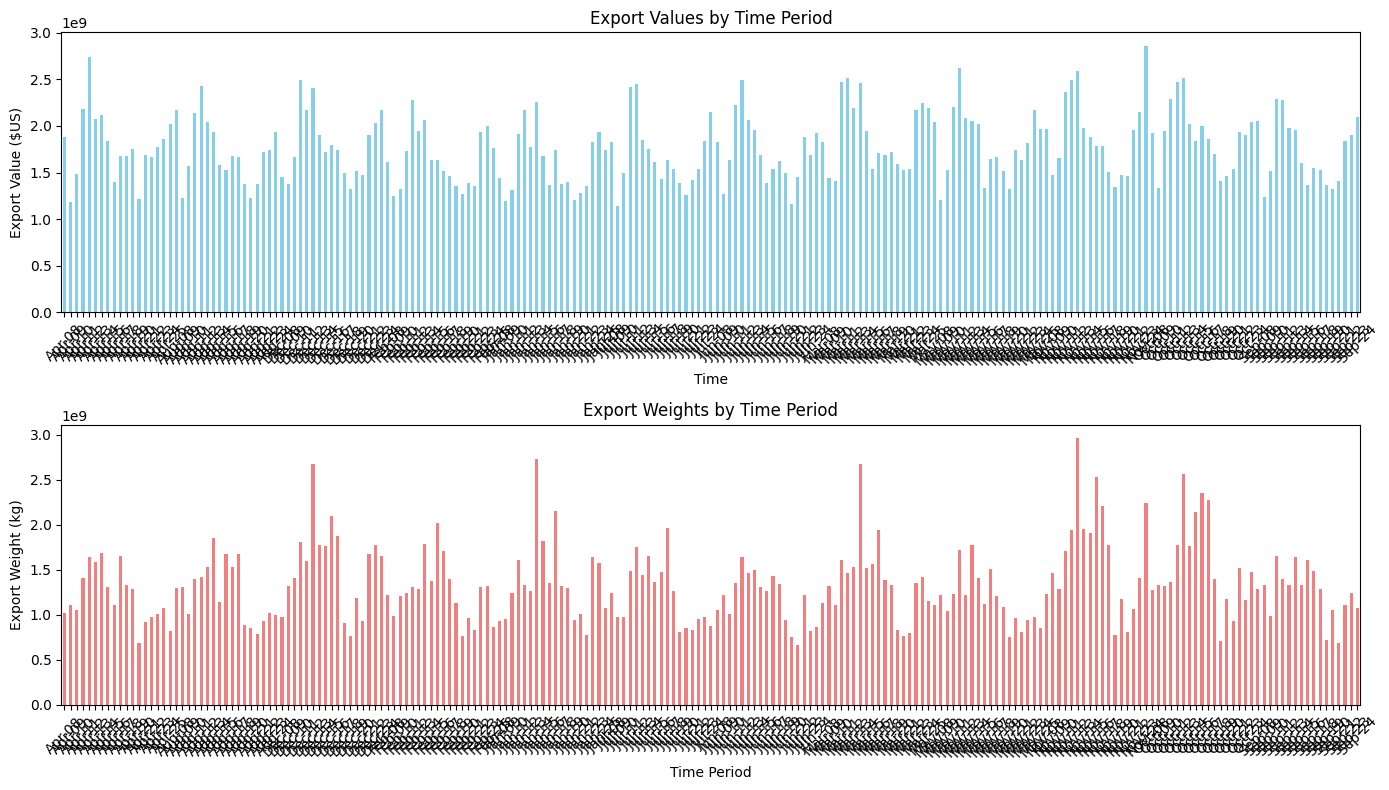

In [13]:
# Temporal export analysis
if datetime_conversion_success:
    # Monthly export analysis
    monthly_exports_value = df.groupby('Month')[amount_col].sum()
    monthly_exports_weight = df.groupby('Month')[quantity_col].sum()
    
    # Create month names for better visualization
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Plot monthly trends
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Monthly export values
    ax1.plot(range(1, 13), [monthly_exports_value.get(i, 0) for i in range(1, 13)], 
             marker='o', linewidth=2, markersize=8, color='blue')
    ax1.set_title('Monthly Export Values Throughout the Year', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Export Value ($US)', fontsize=12)
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels(month_names)
    ax1.grid(True, alpha=0.3)
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
    
    # Monthly export weights
    ax2.plot(range(1, 13), [monthly_exports_weight.get(i, 0) for i in range(1, 13)], 
             marker='s', linewidth=2, markersize=8, color='red')
    ax2.set_title('Monthly Export Weights Throughout the Year', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Export Weight (kg)', fontsize=12)
    ax2.set_xlabel('Month', fontsize=12)
    ax2.set_xticks(range(1, 13))
    ax2.set_xticklabels(month_names)
    ax2.grid(True, alpha=0.3)
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M kg'))
    
    plt.tight_layout()
    plt.show()
    
    # Print monthly statistics
    print('=== MONTHLY EXPORT ANALYSIS ===\n')
    for month in range(1, 13):
        value = monthly_exports_value.get(month, 0)
        weight = monthly_exports_weight.get(month, 0)
        print(f'{month_names[month-1]}: ${value:,.0f} ({weight:,.0f} kg)')
        
else:
    # Fallback analysis using time periods as-is
    time_exports_value = df.groupby(time_col)[amount_col].sum().sort_index()
    time_exports_weight = df.groupby(time_col)[quantity_col].sum().sort_index()
    
    print('=== EXPORT ANALYSIS BY TIME PERIOD ===\n')
    print('Export values by time period:')
    for period, value in time_exports_value.items():
        weight = time_exports_weight.get(period, 0)
        print(f'{period}: ${value:,.0f} ({weight:,.0f} kg)')
    
    # Plot time series
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
    
    time_exports_value.plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title('Export Values by Time Period')
    ax1.set_ylabel('Export Value ($US)')
    ax1.tick_params(axis='x', rotation=45)
    
    time_exports_weight.plot(kind='bar', ax=ax2, color='lightcoral')
    ax2.set_title('Export Weights by Time Period')
    ax2.set_ylabel('Export Weight (kg)')
    ax2.set_xlabel('Time Period')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

In [14]:
# Seasonal commodity analysis
print('\n=== SEASONAL COMMODITY PATTERNS ===\n')

if datetime_conversion_success:
    # Define seasons
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'
    
    df['Season'] = df['Month'].apply(get_season)
    
    # Top commodities by season
    seasons = ['Spring', 'Summer', 'Fall', 'Winter']
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, season in enumerate(seasons):
        season_data = df[df['Season'] == season]
        season_commodities = season_data.groupby(commodity_col)[amount_col].sum().sort_values(ascending=False).head(8)
        
        # Plot top commodities for this season
        season_commodities.plot(kind='bar', ax=axes[i], color=plt.cm.Set3(i))
        axes[i].set_title(f'Top Commodities in {season}', fontsize=12, fontweight='bold')
        axes[i].set_ylabel('Export Value ($US)')
        axes[i].tick_params(axis='x', rotation=45, labelsize=8)
        axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
        
        # Print seasonal analysis
        total_season_value = season_data[amount_col].sum()
        total_season_weight = season_data[quantity_col].sum()
        unique_commodities = season_data[commodity_col].nunique()
        
        print(f'{season}:')
        print(f'  • Total Export Value: ${total_season_value:,.0f}')
        print(f'  • Total Export Weight: {total_season_weight:,.0f} kg')
        print(f'  • Number of Commodities: {unique_commodities}')
        print(f'  • Top 3 Commodities:')
        for j, (commodity, value) in enumerate(season_commodities.head(3).items(), 1):
            percentage = (value / total_season_value) * 100
            print(f'    {j}. {commodity}: ${value:,.0f} ({percentage:.1f}%)')
        print()
    
    plt.tight_layout()
    plt.show()
    
    # Heatmap of commodity exports by month
    commodity_month_pivot = df.pivot_table(
        index=commodity_col, 
        columns='Month', 
        values=amount_col, 
        aggfunc='sum', 
        fill_value=0
    )
    
    # Select top 15 commodities for heatmap
    top_commodities_overall = df.groupby(commodity_col)[amount_col].sum().sort_values(ascending=False).head(15)
    commodity_month_subset = commodity_month_pivot.loc[top_commodities_overall.index]
    
    plt.figure(figsize=(14, 10))
    import seaborn as sns
    sns.heatmap(commodity_month_subset, 
                annot=False, 
                cmap='YlOrRd', 
                cbar_kws={'label': 'Export Value ($US)'})
    plt.title('Monthly Export Patterns by Commodity (Top 15 Commodities)', fontsize=14, fontweight='bold')
    plt.xlabel('Month')
    plt.ylabel('Commodity')
    plt.xticks(range(12), month_names)
    plt.tight_layout()
    plt.show()
    
else:
    # Alternative analysis for non-datetime data
    print('Analyzing commodity patterns by available time periods...')
    
    for period in sorted(df[time_col].unique()):
        period_data = df[df[time_col] == period]
        period_commodities = period_data.groupby(commodity_col)[amount_col].sum().sort_values(ascending=False).head(5)
        
        total_period_value = period_data[amount_col].sum()
        print(f'\n{period}:')
        print(f'  • Total Export Value: ${total_period_value:,.0f}')
        print(f'  • Top 5 Commodities:')
        for j, (commodity, value) in enumerate(period_commodities.items(), 1):
            percentage = (value / total_period_value) * 100
            print(f'    {j}. {commodity}: ${value:,.0f} ({percentage:.1f}%)')

# Summary insights
print('\n=== KEY TEMPORAL INSIGHTS ===')
if datetime_conversion_success:
    peak_month = monthly_exports_value.idxmax()
    lowest_month = monthly_exports_value.idxmin()
    print(f'• Peak export month: {month_names[peak_month-1]} (${monthly_exports_value[peak_month]:,.0f})')
    print(f'• Lowest export month: {month_names[lowest_month-1]} (${monthly_exports_value[lowest_month]:,.0f})')
    
    seasonal_totals = df.groupby('Season')[amount_col].sum().sort_values(ascending=False)
    print(f'• Highest export season: {seasonal_totals.index[0]} (${seasonal_totals.iloc[0]:,.0f})')
    print(f'• Lowest export season: {seasonal_totals.index[-1]} (${seasonal_totals.iloc[-1]:,.0f})')
else:
    peak_period = time_exports_value.idxmax()
    lowest_period = time_exports_value.idxmin()
    print(f'• Peak export period: {peak_period} (${time_exports_value[peak_period]:,.0f})')
    print(f'• Lowest export period: {lowest_period} (${time_exports_value[lowest_period]:,.0f})')


=== SEASONAL COMMODITY PATTERNS ===

Analyzing commodity patterns by available time periods...

Apr-08:
  • Total Export Value: $1,878,006,903
  • Top 5 Commodities:
    1. 84 Nuclear Reactors, Boilers, Machinery Etc.; Parts: $509,118,627 (27.1%)
    2. 87 Vehicles, Except Railway Or Tramway, And Parts Etc: $311,991,939 (16.6%)
    3. 85 Electric Machinery Etc; Sound Equip; Tv Equip; Pts: $122,311,923 (6.5%)
    4. 12 Oil Seeds Etc.; Misc Grain, Seed, Fruit, Plant Etc: $99,591,733 (5.3%)
    5. 28 Inorg Chem; Prec & Rare-earth Met & Radioact Compd: $83,273,399 (4.4%)

Apr-09:
  • Total Export Value: $1,179,146,863
  • Top 5 Commodities:
    1. 84 Nuclear Reactors, Boilers, Machinery Etc.; Parts: $285,295,502 (24.2%)
    2. 87 Vehicles, Except Railway Or Tramway, And Parts Etc: $187,721,981 (15.9%)
    3. 12 Oil Seeds Etc.; Misc Grain, Seed, Fruit, Plant Etc: $101,758,672 (8.6%)
    4. 10 Cereals: $71,293,586 (6.0%)
    5. 85 Electric Machinery Etc; Sound Equip; Tv Equip; Pts: $63,386,